In [1]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt

status = pd.read_csv('status.csv',encoding = "utf-8")
drivers = pd.read_csv('drivers.csv',encoding = "utf-8")
constructors = pd.read_csv('constructors.csv',encoding = "utf-8")
circuits = pd.read_csv('circuits.csv',encoding = "utf-8")
races = pd.read_csv('races.csv',encoding = "utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")
constructor_standings = pd.read_csv('constructor_standings.csv',encoding = "utf-8")
print('This is the Status data')
status.head()


This is the Status data


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [2]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
drivers['driver_name'] = drivers['forename'] + ' ' + drivers['surname']
col = ['driverId', 'driver_name', 'nationality']
my_drivers = drivers[col]
my_drivers.rename(columns = {'nationality': 'driver_nationality' }, inplace = True)
my_drivers.head()

/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_86315/3935489618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_drivers.rename(columns = {'nationality': 'driver_nationality' }, inplace = True)


,driverId,driver_name,driver_nationality
0,1,Lewis Hamilton,British
1,2,Nick Heidfeld,German
2,3,Nico Rosberg,German
3,4,Fernando Alonso,Spanish
4,5,Heikki Kovalainen,Finnish


In [4]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [5]:
cols = ['constructorId', 'name', 'nationality']
my_constructors = constructors[cols]
my_constructors.rename(columns = {'nationality': 'team_nationality' }, inplace = True)
my_constructors.rename(columns = {'name': 'constructor' }, inplace = True)
my_constructors.head()

/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_86315/1242970380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_constructors.rename(columns = {'nationality': 'team_nationality' }, inplace = True)
/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_86315/1242970380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_constructors.rename(columns = {'name': 'constructor' }, inplace = True)


,constructorId,constructor,team_nationality
0,1,McLaren,British
1,2,BMW Sauber,German
2,3,Williams,British
3,4,Renault,French
4,5,Toro Rosso,Italian


In [6]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [7]:
colss = ['circuitId','circuitRef', 'name', 'location', 'country']
my_circuits = circuits[colss]
my_circuits.rename(columns = {'name': 'circuit' }, inplace = True)
my_circuits.head()

/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_86315/823439227.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_circuits.rename(columns = {'name': 'circuit' }, inplace = True)


,circuitId,circuitRef,circuit,location,country
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain
4,5,istanbul,Istanbul Park,Istanbul,Turkey


In [8]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [9]:
colss4 = ['constructorStandingsId',	'raceId', 'constructorId', 'points']
my_constructor_standings = constructor_standings[colss4]
my_constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0


In [10]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [11]:
colsss = ['raceId', 'year', 'round', 'circuitId', 'name']
my_races = races[colsss]
my_races.rename(columns = {'name': 'prix' }, inplace = True)
my_races.head()

/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_86315/1917903944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_races.rename(columns = {'name': 'prix' }, inplace = True)


,raceId,year,round,circuitId,prix
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [12]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [13]:
col2 = ['resultId', 'raceId', 'driverId', 'constructorId', 'points', 'laps', 'statusId']
my_results = results[col2]
my_results.head()

,resultId,raceId,driverId,constructorId,points,laps,statusId
0,1,18,1,1,10.0,58,1
1,2,18,2,2,8.0,58,1
2,3,18,3,3,6.0,58,1
3,4,18,4,4,5.0,58,1
4,5,18,5,1,4.0,58,1


In [14]:
# make one dataframe
my_data = pd.merge(my_results, my_races, on ='raceId', how ='left')
my_data = pd.merge(my_data, my_circuits, on ='circuitId', how ='left')
my_data = pd.merge(my_data, my_drivers, on ='driverId', how ='left')
my_data = pd.merge(my_data, status, on ='statusId', how ='left')
my_data = pd.merge(my_data, my_constructors, on ='constructorId', how ='left')
my_data = pd.merge(my_data, my_constructor_standings, on =['constructorId', 'raceId'], how ='left')	
my_data.head()

,resultId,raceId,driverId,constructorId,points_x,laps,statusId,year,round,circuitId,...,circuit,location,country,driver_name,driver_nationality,status,constructor,team_nationality,constructorStandingsId,points_y
0,1,18,1,1,10.0,58,1,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Lewis Hamilton,British,Finished,McLaren,British,1.0,14.0
1,2,18,2,2,8.0,58,1,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Nick Heidfeld,German,Finished,BMW Sauber,German,2.0,8.0
2,3,18,3,3,6.0,58,1,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Nico Rosberg,German,Finished,Williams,British,3.0,9.0
3,4,18,4,4,5.0,58,1,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Fernando Alonso,Spanish,Finished,Renault,French,4.0,5.0
4,5,18,5,1,4.0,58,1,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Heikki Kovalainen,Finnish,Finished,McLaren,British,1.0,14.0


In [15]:
# Dataframe of all drivers who finished a Grand Prix
finished_race = my_data.loc[my_data['status'].isin(['Finished', '+1 Lap', '+2 Laps', '+3 Laps', '+4 Laps', '+5 Laps', '+6 Laps', '+7 Laps', '+8 Laps', '+9 Laps',
                                                    '+10 Laps', '+11 Laps', '+14 Laps'])] # included the overlapped status

# Percentage of drivers finishing a race in all of F1 history
finish = round((finished_race.shape[0] / my_data.shape[0]) * 100, 3)

print(f"In all of F1 history, {finish}% drivers have finished a Grand Prix that they started")

In all of F1 history, 55.691% drivers have finished a Grand Prix that they started


In [16]:
my_data.describe()

,resultId,raceId,driverId,constructorId,points_x,laps,statusId,year,round,circuitId,constructorStandingsId,points_y
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,24313.000000,24313.000000
mean,13091.388426,538.896982,268.148739,49.237051,1.918795,46.101795,17.459358,1990.677082,8.393965,23.579908,16719.382224,38.125756
std,7558.893818,304.537441,274.174971,60.420088,4.240048,29.691532,26.161846,19.573972,4.957933,18.782538,8916.962800,80.463991
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000
25%,6545.750000,295.000000,57.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000,8685.000000,1.000000
50%,13090.500000,521.000000,164.000000,25.000000,0.000000,53.000000,10.000000,1991.000000,8.000000,18.000000,20138.000000,10.000000
75%,19635.250000,794.000000,373.000000,59.000000,2.000000,66.000000,14.000000,2008.000000,12.000000,34.000000,25045.000000,36.000000
max,26185.000000,1115.000000,859.000000,214.000000,50.000000,200.000000,141.000000,2023.000000,22.000000,79.000000,28632.000000,765.000000


In [17]:
# List of statusId values to exclude - those who finished 
exclude_ids = [1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 45, 50, 128, 53, 55, 58, 88, 111, 112,
               113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 127, 133, 134]

# Filter data to exclude specific statusId values and include all the rest
crashes = my_data.loc[~my_data['statusId'].isin(exclude_ids)]

# Describe the resulting data
crashes.describe()
#11524


,resultId,raceId,driverId,constructorId,points_x,laps,statusId,year,round,circuitId,constructorStandingsId,points_y
count,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,11524.000000,10479.000000,10479.000000
mean,11865.126605,494.742798,238.241843,51.008330,0.013016,24.274731,30.516314,1985.009198,7.826189,23.992103,15096.260807,18.181649
std,6353.839707,249.597802,219.073648,55.302585,0.187255,24.745933,33.581783,17.070282,4.650605,17.857834,8182.478043,44.405906
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1950.000000,1.000000,1.000000,2.000000,0.000000
25%,6700.750000,308.000000,88.000000,15.000000,0.000000,2.000000,5.000000,1974.000000,4.000000,10.000000,8487.000000,0.000000
50%,11589.500000,477.000000,170.000000,32.000000,0.000000,19.000000,10.000000,1986.000000,7.000000,19.000000,11282.000000,4.000000
75%,16871.000000,681.000000,327.250000,60.000000,0.000000,40.000000,54.000000,1996.000000,11.000000,36.000000,22865.500000,17.000000
max,26185.000000,1115.000000,858.000000,214.000000,6.000000,196.000000,141.000000,2023.000000,22.000000,79.000000,28629.000000,701.000000


In [18]:
# Remove duplicates based on 'raceId' and 'driverId'
crashes_unique = crashes.drop_duplicates(subset=['raceId', 'driverId'])

crashes_unique.describe()

,resultId,raceId,driverId,constructorId,points_x,laps,statusId,year,round,circuitId,constructorStandingsId,points_y
count,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000,10473.000000,10473.000000
mean,11847.029396,494.093147,237.580275,50.890503,0.013046,24.143416,30.504175,1985.074709,7.835624,23.988607,15093.612336,18.184713
std,6349.071231,249.491276,218.839733,55.278920,0.187466,24.425842,33.576483,17.031860,4.649396,17.858035,8183.935630,44.417275
min,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1950.000000,1.000000,1.000000,2.000000,0.000000
25%,6694.250000,308.000000,88.000000,15.000000,0.000000,2.000000,5.000000,1974.000000,4.000000,10.000000,8485.000000,0.000000
50%,11563.500000,476.000000,170.000000,32.000000,0.000000,19.000000,10.000000,1986.000000,7.000000,19.000000,11280.000000,4.000000
75%,16841.750000,679.000000,326.000000,59.000000,0.000000,40.000000,54.000000,1996.000000,11.000000,36.000000,22866.000000,17.000000
max,26185.000000,1115.000000,858.000000,214.000000,6.000000,196.000000,141.000000,2023.000000,22.000000,79.000000,28629.000000,701.000000


In [19]:
crashes.head()

,resultId,raceId,driverId,constructorId,points_x,laps,statusId,year,round,circuitId,...,circuit,location,country,driver_name,driver_nationality,status,constructor,team_nationality,constructorStandingsId,points_y
6,7,18,7,5,2.0,55,5,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Sébastien Bourdais,French,Engine,Toro Rosso,Italian,5.0,2.0
7,8,18,8,6,1.0,53,5,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Kimi Räikkönen,Finnish,Engine,Ferrari,Italian,6.0,1.0
8,9,18,9,2,0.0,47,4,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Robert Kubica,Polish,Collision,BMW Sauber,German,2.0,8.0
9,10,18,10,7,0.0,43,3,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Timo Glock,German,Accident,Toyota,Japanese,NaN,NaN
10,11,18,11,8,0.0,32,7,2008,1,1,...,Albert Park Grand Prix Circuit,Melbourne,Australia,Takuma Sato,Japanese,Transmission,Super Aguri,Japanese,NaN,NaN


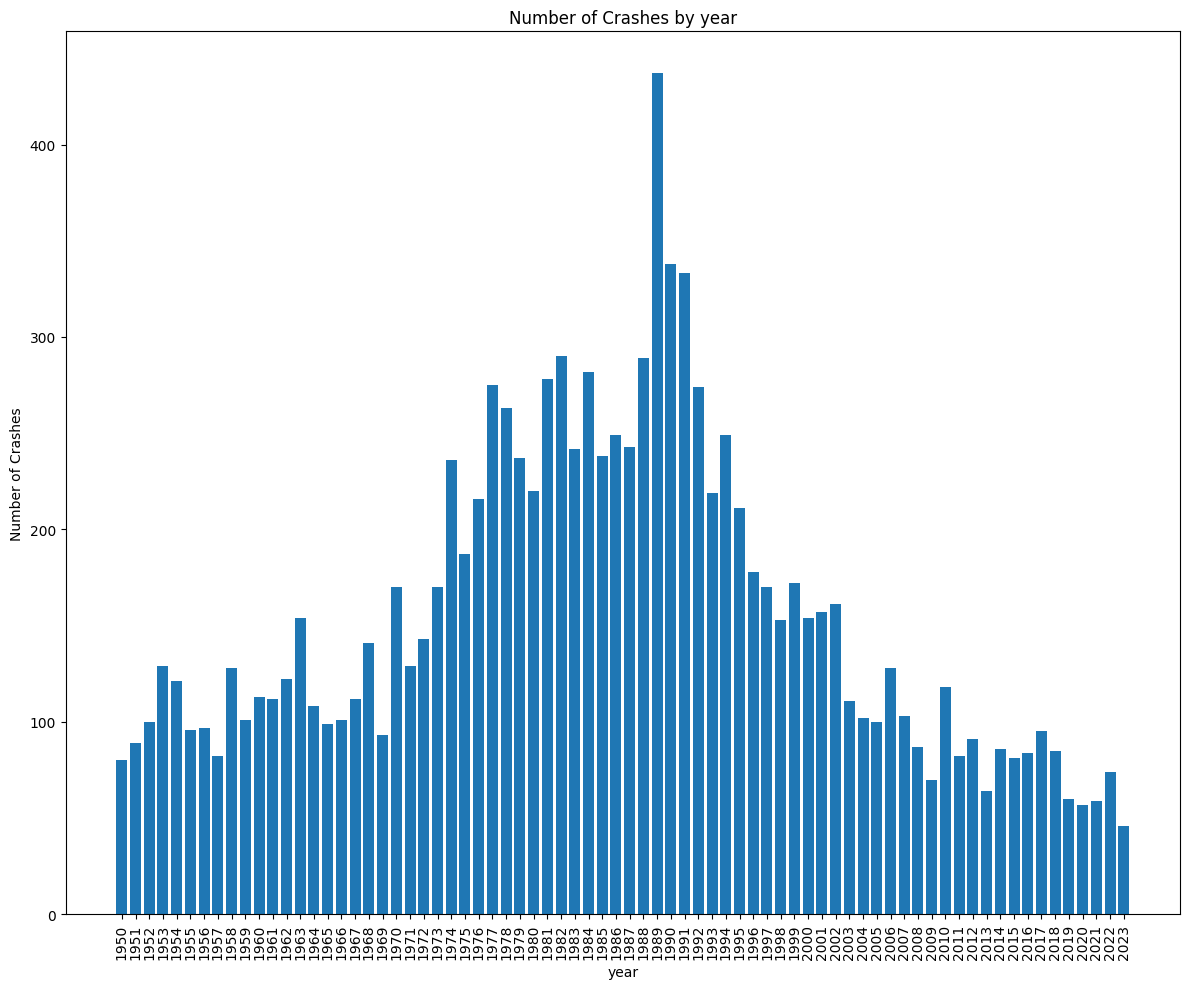

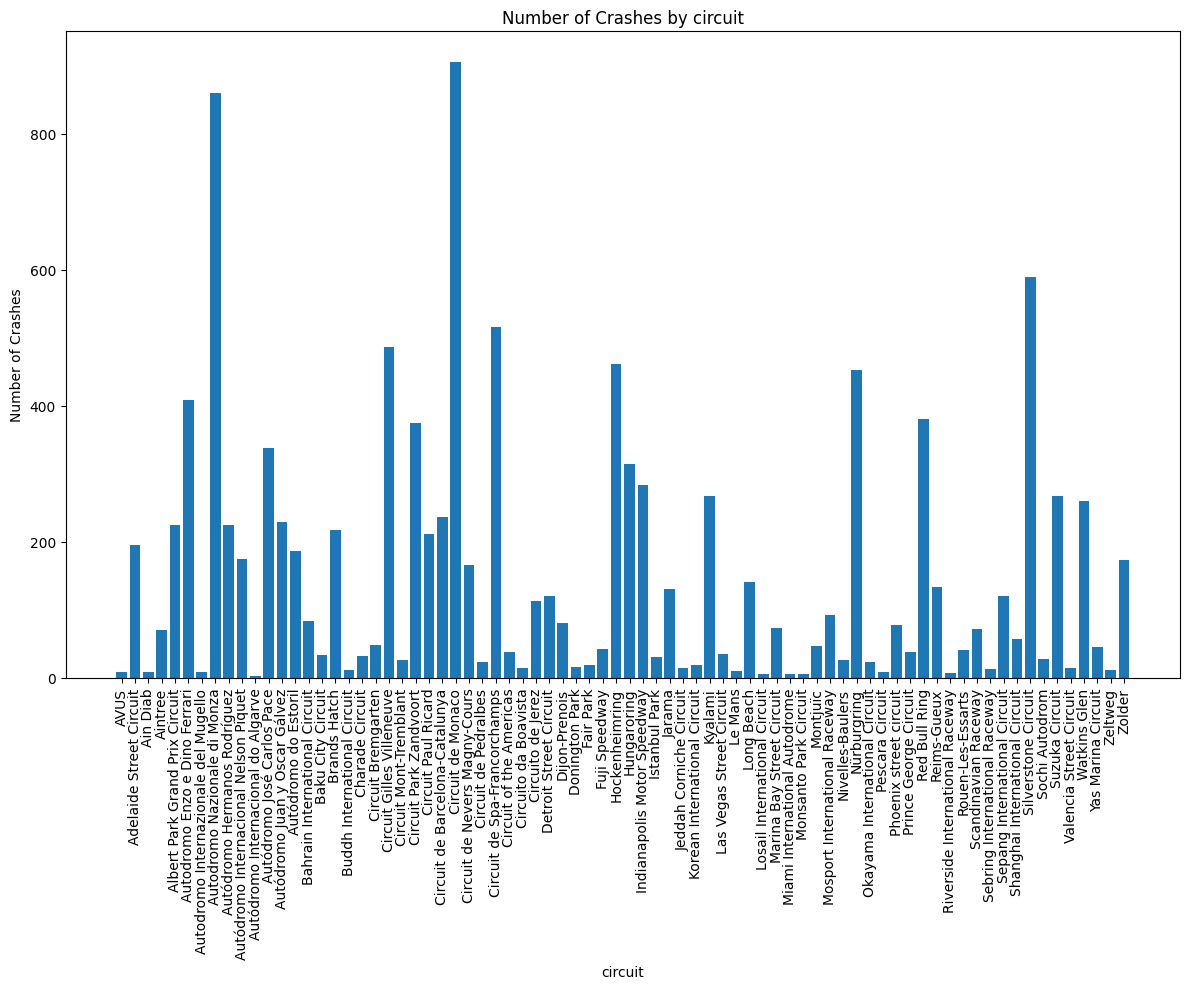

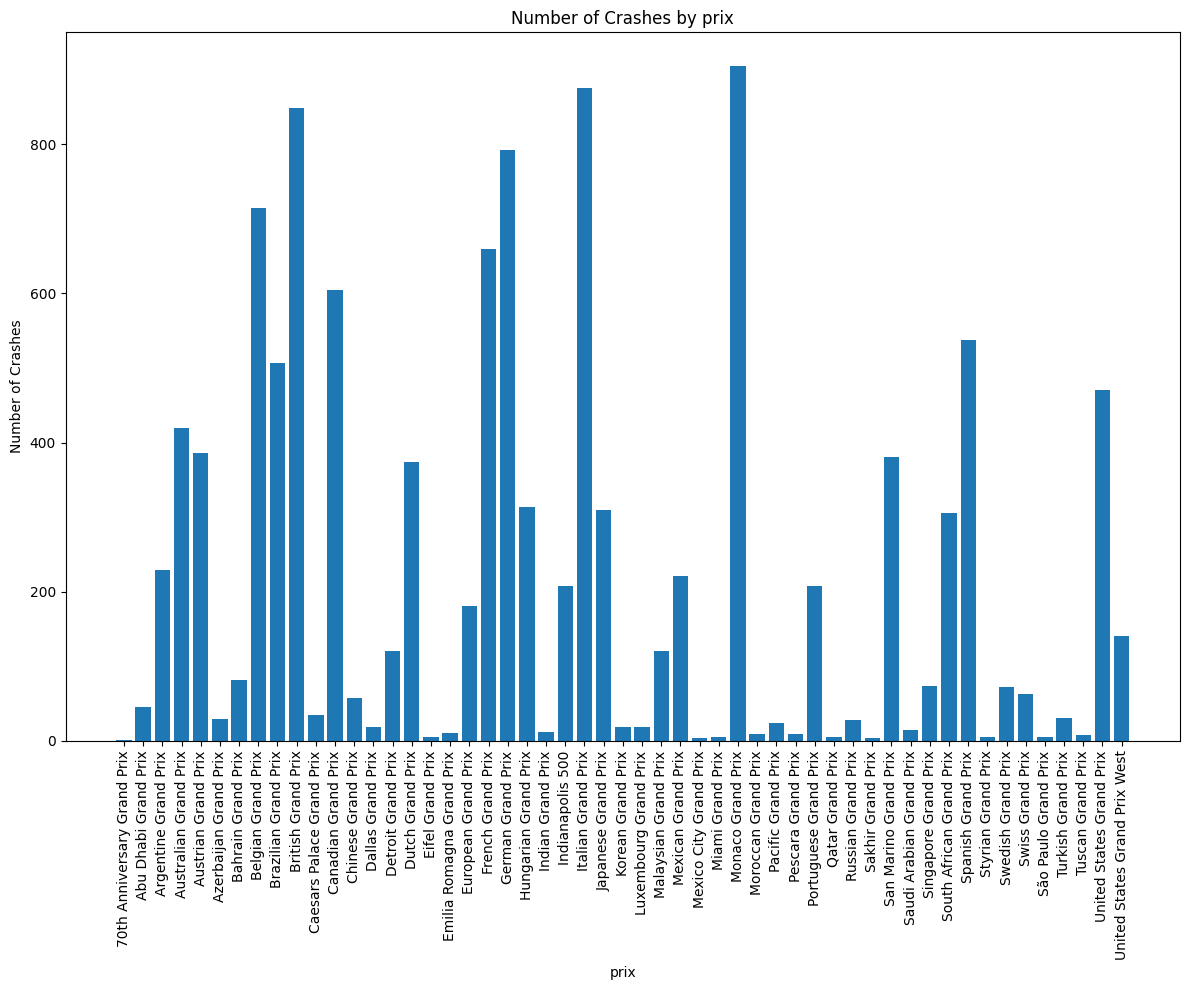

In [20]:
def plot_crashes_by_columns(crashes, column_names):
    """Plot the number of crashes based on the selected columns from the crashes df."""
    
    for column_name in column_names:
        crashes_by_column = crashes.groupby(column_name).size()

        plt.figure(figsize=(12, 10))
        plt.bar(crashes_by_column.index, crashes_by_column.values)
        plt.title(f'Number of Crashes by {column_name}')
        plt.ylabel('Number of Crashes')
        plt.xlabel(column_name)
        plt.xticks(crashes_by_column.index, rotation=90)
        plt.tight_layout()
        plt.show()

# Example usage:
columns_to_plot = ['year', 'circuit', 'prix']
plot_crashes_by_columns(crashes, columns_to_plot)


In [22]:
import plotly.express as px
import plotly.graph_objects as go

def plot_dnf(year):
    # Filter crashes for the given year
    crashes_in_specific_year = crashes[crashes['year'] == year]
    
    # For Drivers
    crashes_driver = crashes_in_specific_year.groupby('driver_name').size().reset_index(name='counts')
    scaled_size_driver = crashes_driver['counts']**2
    fig_driver = create_bubble_chart(crashes_driver, 'driver_name', scaled_size_driver, 'Driver Name', f'DNFs by Driver in {year}')
    fig_driver.show()

    # For Constructors
    crashes_team = crashes_in_specific_year.groupby('constructor').size().reset_index(name='counts')
    scaled_size_team = crashes_team['counts']**2
    fig_team = create_bubble_chart(crashes_team, 'constructor', scaled_size_team, 'Constructor', f'DNFs by Constructor in {year}')
    fig_team.show()

def create_bubble_chart(df, x_col, scaled_size, xaxis_title, chart_title):
    colors = px.colors.qualitative.Plotly

    fig = go.Figure(data=[go.Scatter(
        x=df[x_col], y=df['counts'],
        mode='markers',
        marker=dict(
            color=colors * (len(df) // len(colors)) + colors[:len(df) % len(colors)],
            size=scaled_size / max(scaled_size) * 100,  # Normalize and then scale to desired range
            sizemin=6  # Minimum marker size
        )
    )])

    fig.update_layout(
        height=800,
        yaxis=dict(title='Number of DNFs'),
        xaxis=dict(title=xaxis_title),
        title=chart_title
    )

    return fig


In [88]:
# Use the function
plot_dnf(2022)

In [24]:
races.head()
races_points = races[['raceId', 'year']]
races_points.head()

,raceId,year
0,1,2009
1,2,2009
2,3,2009
3,4,2009
4,5,2009


In [25]:
constructor_standings.head()
constructor_points = constructor_standings[['constructorStandingsId', 'raceId', 'constructorId', 'points']]
constructor_points.head()

,constructorStandingsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0


In [26]:
constructors.head()
cons = constructors[['constructorId', 'name']]
cons.head()

,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso


In [27]:
final_df = pd.merge(constructor_points, cons, on = 'constructorId', how = 'left')
final_df = pd.merge(final_df, races_points, on = 'raceId', how = 'left')
final_df.head()


,constructorStandingsId,raceId,constructorId,points,name,year
0,1,18,1,14.0,McLaren,2008
1,2,18,2,8.0,BMW Sauber,2008
2,3,18,3,9.0,Williams,2008
3,4,18,4,5.0,Renault,2008
4,5,18,5,2.0,Toro Rosso,2008


In [28]:
filtered_df = final_df[(final_df['year'] == 2021) & (final_df['name'] == 'Red Bull')]
filtered_df


,constructorStandingsId,raceId,constructorId,points,name,year
12494,27904,1051,9,541.5,Red Bull,2021
12497,27674,1052,9,28.0,Red Bull,2021
12509,27704,1053,9,53.0,Red Bull,2021
12517,27714,1054,9,83.0,Red Bull,2021
12527,27724,1055,9,112.0,Red Bull,2021
12537,27734,1056,9,149.0,Red Bull,2021
12547,27744,1057,9,174.0,Red Bull,2021
12557,27754,1059,9,215.0,Red Bull,2021
12567,27764,1058,9,252.0,Red Bull,2021
12584,27784,1060,9,286.0,Red Bull,2021


In [29]:
idx = final_df.groupby(['constructorId', 'year'])['points'].idxmax()
result_df = final_df.loc[idx]
result_df


,constructorStandingsId,raceId,constructorId,points,name,year
9579,21102,678,1,0.0,McLaren,1968
8323,21773,641,1,10.0,McLaren,1971
8229,22024,631,1,47.0,McLaren,1972
8121,22204,619,1,58.0,McLaren,1973
7963,22438,604,1,73.0,McLaren,1974
...,...,...,...,...,...,...
12896,28368,1093,213,35.0,AlphaTauri,2022
13078,28600,1113,213,5.0,AlphaTauri,2023
12703,27930,1073,214,155.0,Alpine F1 Team,2021
12925,28397,1096,214,173.0,Alpine F1 Team,2022


In [30]:
filtered_df2 = result_df[(result_df['year'] == 2005)] # change year to view constructor standings for that year
# pick random years and match with F1.com values 
filtered_df2

,constructorStandingsId,raceId,constructorId,points,name,year
725,28127,89,1,182.0,McLaren,2005
726,28126,89,3,66.0,Williams,2005
729,28123,89,4,191.0,Renault,2005
718,28114,88,6,100.0,Ferrari,2005
724,28128,89,7,88.0,Toyota,2005
727,28125,89,9,34.0,Red Bull,2005
723,28129,89,15,20.0,Sauber,2005
722,28130,89,16,38.0,BAR,2005
691,28101,86,17,12.0,Jordan,2005
620,28032,79,18,7.0,Minardi,2005


In [31]:
# Count the number of driverId entries for each constructor in each year
retire_driver_counts = crashes.groupby(['year', 'constructorId', 'constructor']).size().reset_index(name='DNF_count')


retire_driver_counts

,year,constructorId,constructor,DNF_count
0,1950,6,Ferrari,7
1,1950,51,Alfa Romeo,9
2,1950,87,Cooper,1
3,1950,105,Maserati,21
4,1950,107,Watson,1
...,...,...,...,...
1043,2023,117,Aston Martin,4
1044,2023,131,Mercedes,4
1045,2023,210,Haas F1 Team,4
1046,2023,213,AlphaTauri,4


In [32]:
reg_df = pd.merge(result_df, retire_driver_counts, on = ['year', 'constructorId'], how = 'left')
reg_df = reg_df[['constructorId', 'points',	'name',	'year',	'DNF_count']]

reg_df.head()

,constructorId,points,name,year,DNF_count
0,1,0.0,McLaren,1968,1.0
1,1,10.0,McLaren,1971,15.0
2,1,47.0,McLaren,1972,4.0
3,1,58.0,McLaren,1973,9.0
4,1,73.0,McLaren,1974,12.0


In [33]:
# Testing if the points still work
filtered_df23 = reg_df[(reg_df['year'] == 2022)] # change year to view constructor standings & DNF for that year
# pick random years and match with F1.com values 
filtered_df23

,constructorId,points,name,year,DNF_count
52,1,159.0,McLaren,2022,5.0
104,3,8.0,Williams,2022,10.0
208,6,554.0,Ferrari,2022,9.0
238,9,759.0,Red Bull,2022,5.0
581,51,55.0,Alfa Romeo,2022,11.0
750,117,55.0,Aston Martin,2022,6.0
772,131,515.0,Mercedes,2022,3.0
899,210,37.0,Haas F1 Team,2022,8.0
905,213,35.0,AlphaTauri,2022,9.0
908,214,173.0,Alpine F1 Team,2022,8.0


In [34]:
# Fill rows with NaN values
reg_df['DNF_count'].fillna(0, inplace=True)

reg_df.describe()

,constructorId,points,year,DNF_count
count,910.000000,910.000000,910.000000,910.000000
mean,56.208791,52.279121,1987.569231,11.718681
std,62.416469,111.256266,18.169691,7.598997
min,1.000000,0.000000,1958.000000,0.000000
25%,9.000000,0.000000,1973.000000,6.000000
50%,32.000000,11.000000,1986.000000,11.000000
75%,72.750000,52.000000,2002.000000,17.000000
max,214.000000,765.000000,2023.000000,50.000000


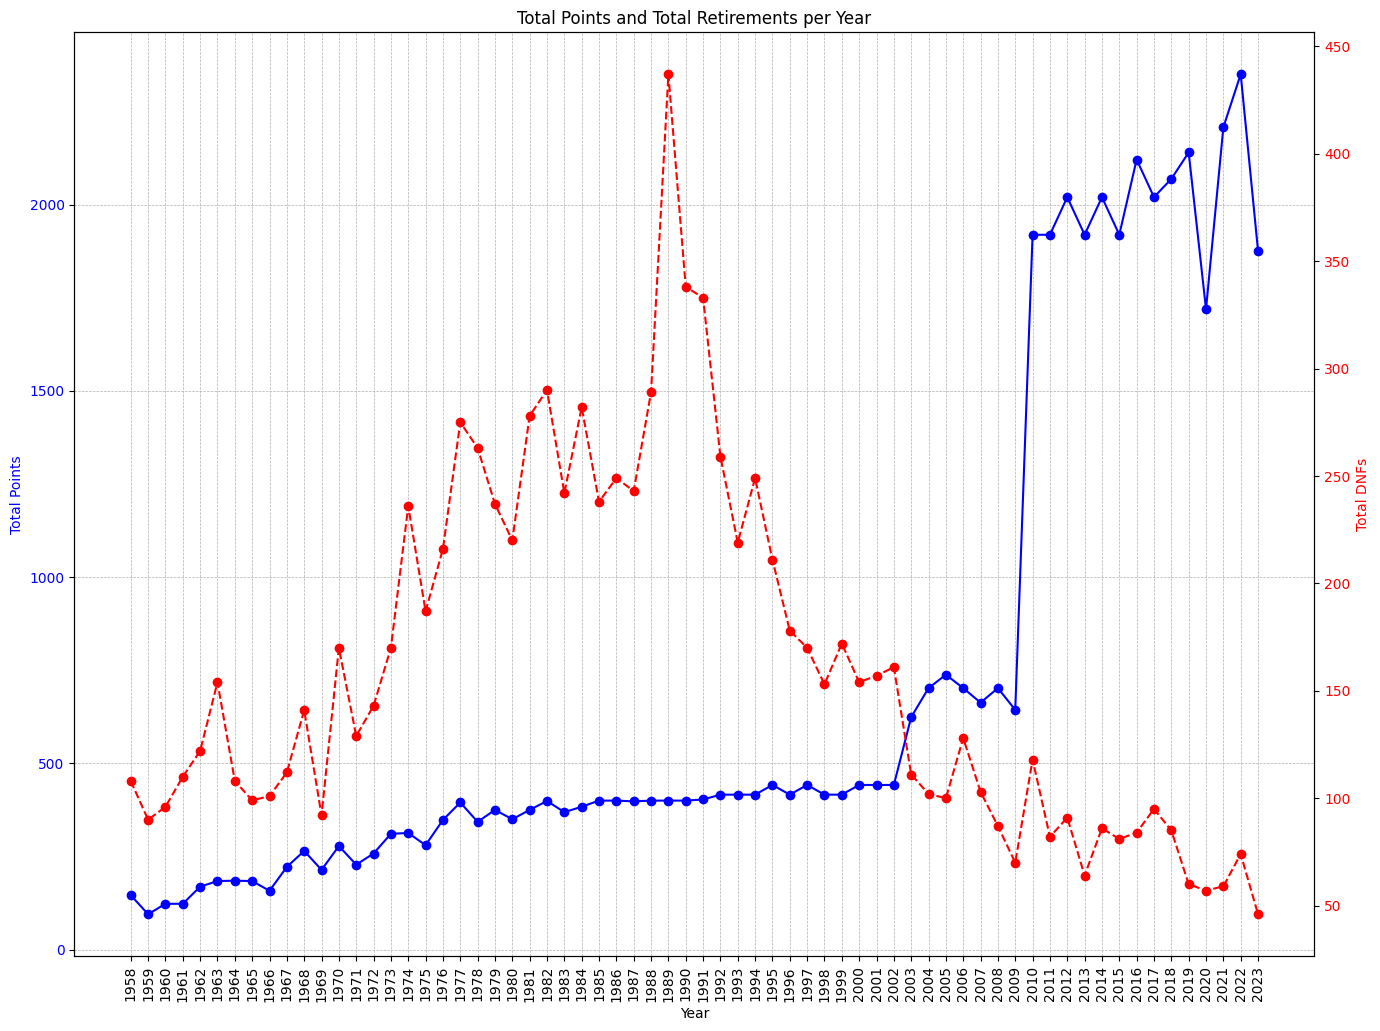

In [87]:
# Group by year, sum  'points' and 'DNF_count'
grouped_data = reg_df.groupby('year').agg({'points': 'sum', 'DNF_count': 'sum'}).reset_index()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(16, 12))

# Plot total points per year
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Points', color='blue')
ax1.plot(grouped_data['year'], grouped_data['points'], color='blue', marker='o', label='Total Points')
ax1.tick_params(axis='y', labelcolor='blue')

# Make sure every year has its own tick on the x-axis
ax1.set_xticks(grouped_data['year'])
ax1.set_xticklabels(grouped_data['year'], rotation=90)

# Add a grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis for total DNFs
ax2 = ax1.twinx()  
ax2.set_ylabel('Total DNFs', color='red')  
ax2.plot(grouped_data['year'], grouped_data['DNF_count'], color='red', marker='o', linestyle='--', label='Total DNFs')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and show plot
plt.title('Total Points and Total Retirements per Year')
plt.show()



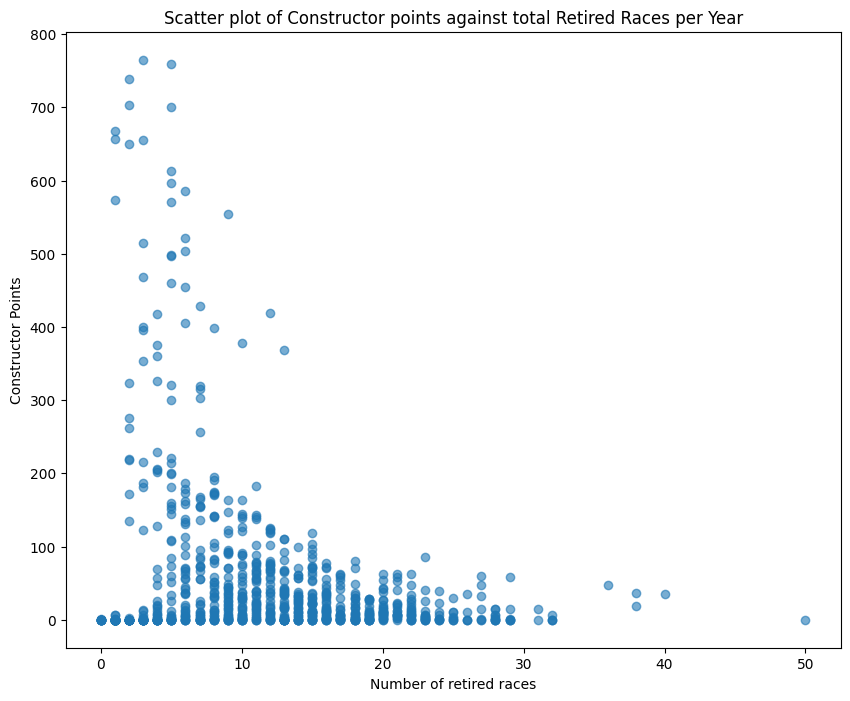

In [71]:
plt.figure(figsize = (10,8))
plt.scatter(reg_df['DNF_count'], reg_df['points'], alpha = 0.6)
plt.title('Scatter plot of Constructor points against total Retired Races per Year')
plt.xlabel('Number of retired races')
plt.ylabel('Constructor Points')
plt.show()


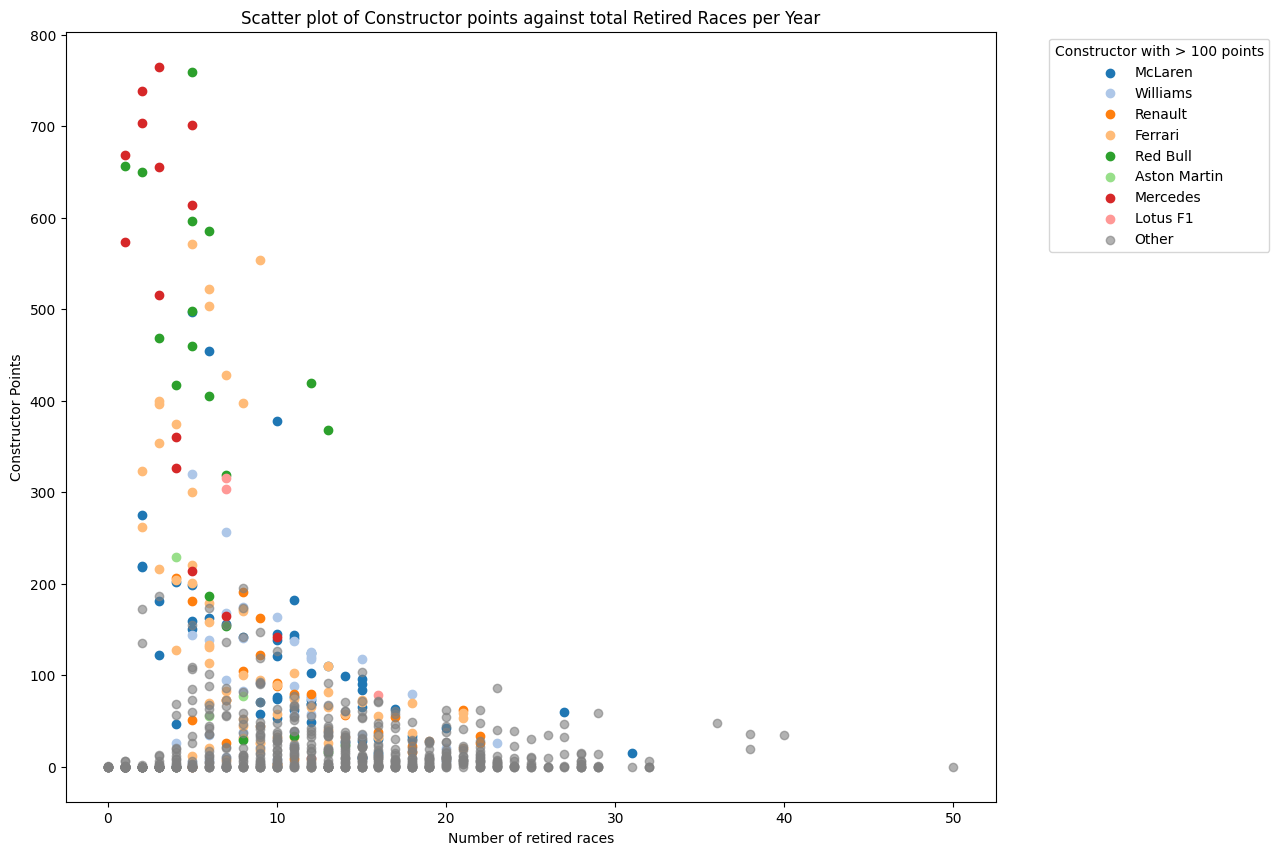

In [68]:
# Identify constructors with any entry that has points exceeding 500
constructors_over_500 = reg_df[reg_df['points'] > 200]['name'].unique()
color_mapping = dict(zip(constructors_over_500, plt.cm.tab20.colors[:len(constructors_over_500)]))

# Default color for other constructors
default_color = 'gray'

plt.figure(figsize=(12, 10))

# Plotting points with specific colors for identified constructors
for constructor in constructors_over_500:
    subset = reg_df[reg_df['name'] == constructor]
    plt.scatter(subset['DNF_count'], subset['points'], color=color_mapping[constructor], label=constructor)

# Plotting points with default color for other constructors
subset_default = reg_df[~reg_df['name'].isin(constructors_over_500)]
plt.scatter(subset_default['DNF_count'], subset_default['points'], color=default_color, alpha=0.6, label="Other")

plt.title('Scatter plot of Constructor points against total Retired Races per Year')
plt.xlabel('Number of retired races')
plt.ylabel('Constructor Points')
plt.legend(title='Constructor with > 100 points', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()


In [41]:
import statsmodels.api as sm

# Assuming reg_df has been defined and NaN values have been filled or dropped

# Prepare data
X = reg_df[['DNF_count']]
y = reg_df['points']

# Add a constant to the predictor variables (it's required for the statsmodels regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     56.88
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.12e-13
Time:                        03:18:41   Log-Likelihood:                -5550.9
No. Observations:                 910   AIC:                         1.111e+04
Df Residuals:                     908   BIC:                         1.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.9376      6.582     14.272      0.0

# Choose this because top scorers have fewer DNFs so grouping by constructor. 

In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Mixed-effects model
model = smf.mixedlm('points ~ DNF_count', reg_df, groups = reg_df['name'])
result = model.fit()

# Print summary
print(result.summary())



         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: points    
No. Observations: 910     Method:             REML      
No. Groups:       159     Scale:              5278.4037 
Min. group size:  1       Log-Likelihood:     -5286.2536
Max. group size:  66      Converged:          Yes       
Mean group size:  5.7                                   
--------------------------------------------------------
             Coef.   Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     46.514    7.259  6.408 0.000 32.287 60.740
DNF_count     -2.181    0.400 -5.453 0.000 -2.965 -1.397
Group Var   3738.658    7.529                           



# Grouping by year because a different points system was employed for each year. Does this make sense? 

In [70]:
# Mixed-effects model
model = smf.mixedlm('points ~ DNF_count', reg_df, groups = reg_df['year'])
result = model.fit()

# Print summary
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: points    
No. Observations: 910     Method:             REML      
No. Groups:       66      Scale:              8851.2622 
Min. group size:  9       Log-Likelihood:     -5481.4208
Max. group size:  22      Converged:          Yes       
Mean group size:  13.8                                  
--------------------------------------------------------
            Coef.   Std.Err.   z    P>|z| [0.025  0.975]
--------------------------------------------------------
Intercept    92.477    9.543  9.691 0.000 73.774 111.180
DNF_count    -2.755    0.486 -5.672 0.000 -3.707  -1.803
Group Var  3303.548    7.958                            



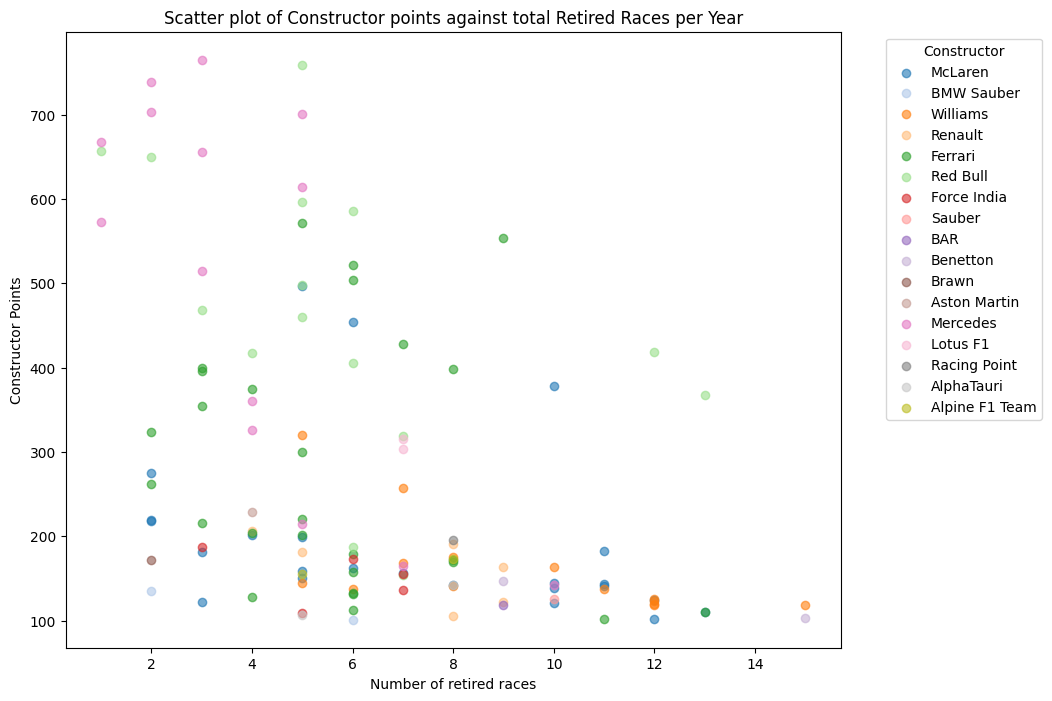

In [66]:
# EXTRA PLOT FOR FUN

# Filter rows where points exceed 500
filtered_df = reg_df[reg_df['points'] > 100]

# Create a unique list of constructors and assign colors
unique_constructors = filtered_df['name'].unique()
color_mapping = dict(zip(unique_constructors, plt.cm.tab20.colors[:len(unique_constructors)]))

plt.figure(figsize=(10, 8))

# Plotting
for constructor, color in color_mapping.items():
    subset = filtered_df[filtered_df['name'] == constructor]
    plt.scatter(subset['DNF_count'], subset['points'], color=color, alpha=0.6, label=constructor)

plt.title('Scatter plot of Constructor points against total Retired Races per Year')
plt.xlabel('Number of retired races')
plt.ylabel('Constructor Points')
plt.legend(title='Constructor', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside plot
plt.show()
